In [84]:
# Load packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("data/hipparcos-voidmain.csv")
df.head()

,Catalog,HIP,Proxy,RAhms,DEdms,Vmag,VarFlag,r_Vmag,RAdeg,DEdeg,...,Survey,Chart,Notes,HD,BD,CoD,CPD,(V-I)red,SpType,r_SpType
0,H,1,NaN,00 00 00.22,+01 05 20.4,9.10,NaN,H,0.000912,1.089013,...,S,NaN,NaN,224700.0,B+00 5077,NaN,NaN,0.66,F5,S
1,H,2,NaN,00 00 00.91,-19 29 55.8,9.27,NaN,G,0.003797,-19.498837,...,NaN,NaN,NaN,224690.0,B-20 6688,NaN,NaN,1.04,K3V,4
2,H,3,NaN,00 00 01.20,+38 51 33.4,6.61,NaN,G,0.005008,38.859286,...,S,NaN,NaN,224699.0,B+38 5108,NaN,NaN,0.00,B9,S
3,H,4,NaN,00 00 02.01,-51 53 36.8,8.06,NaN,H,0.008382,-51.893546,...,S,NaN,NaN,224707.0,NaN,NaN,P-52 12237,0.43,F0V,2
4,H,5,NaN,00 00 02.39,-40 35 28.4,8.55,NaN,H,0.009965,-40.591224,...,NaN,NaN,NaN,224705.0,NaN,C-41 15372,P-41 9991,0.95,G8III,2


In [3]:
print(df.columns)

Index(['Catalog', 'HIP', 'Proxy', 'RAhms', 'DEdms', 'Vmag', 'VarFlag',
       'r_Vmag', 'RAdeg', 'DEdeg', 'AstroRef', 'Plx', 'pmRA', 'pmDE',
       'e_RAdeg', 'e_DEdeg', 'e_Plx', 'e_pmRA', 'e_pmDE', 'DE:RA', 'Plx:RA',
       'Plx:DE', 'pmRA:RA', 'pmRA:DE', 'pmRA:Plx', 'pmDE:RA', 'pmDE:DE',
       'pmDE:Plx', 'pmDE:pmRA', 'F1', 'F2', '---', 'BTmag', 'e_BTmag', 'VTmag',
       'e_VTmag', 'm_BTmag', 'B-V', 'e_B-V', 'r_B-V', 'V-I', 'e_V-I', 'r_V-I',
       'CombMag', 'Hpmag', 'e_Hpmag', 'Hpscat', 'o_Hpmag', 'm_Hpmag', 'Hpmax',
       'HPmin', 'Period', 'HvarType', 'moreVar', 'morePhoto', 'CCDM', 'n_CCDM',
       'Nsys', 'Ncomp', 'MultFlag', 'Source', 'Qual', 'm_HIP', 'theta', 'rho',
       'e_rho', 'dHp', 'e_dHp', 'Survey', 'Chart', 'Notes', 'HD', 'BD', 'CoD',
       'CPD', '(V-I)red', 'SpType', 'r_SpType'],
      dtype='object')


# Important fields

https://heasarc.gsfc.nasa.gov/W3Browse/all/hipparcos.html

Most photometry/astronomy data sets include the magnitude information in each passband/filter for each object in the catalog. You can then use the individual magnitudes to calculate color indices to get additional information about the star's color. One thing about this photometry data set is that a lot of color indices are already calculated, so it eliminates the need to create additional features for this data.

The primary information contained in this data set is magnitude, color index, proper motion and parallax, and some variable/double star information. Many of the fields point to other catalogs which might contain additional information about a particular object. This is useful if evaluating the object overall, but not as useful if you're considering the observations from this data set as of the time they were taken.

In [5]:
df['Vmag'].describe()

count    118217.000000
mean          8.373233
std           1.312044
min          -1.440000
25%           7.640000
50%           8.440000
75%           9.150000
max          14.080000
Name: Vmag, dtype: float64

The magnitudes of the stars in this data set range from -1.44 to 14.08 -- negative magnitude stars are very bright ones like Sirius, and the naked eye can see to 5th or 6th magnitude depending on seeing conditions. There doesn't appear to be any outliers in the V-magnitude looking at the data this way, but I want to see something visual.

In [9]:
vMagCounts = df['Vmag'].value_counts()
print(vMagCounts)

8.69     504
8.60     497
8.27     497
8.94     492
8.52     491
        ... 
1.67       1
12.77      1
13.49      1
2.10       1
13.11      1
Name: Vmag, Length: 1126, dtype: int64


<Figure size 864x432 with 0 Axes>

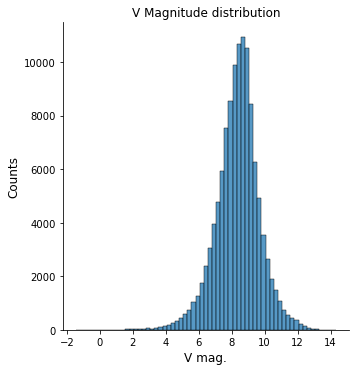

In [28]:
plt.figure(figsize=(12,6))
sns.displot(df["Vmag"], binwidth=.25)
plt.title('V Magnitude distribution')
plt.ylabel('Counts', fontsize=12)
plt.xlabel('V mag.', fontsize=12)
plt.show()

So it looks like the V mag (the band closest to what we can observe visually, around the green area of the spectrum) has a normal distribution - not sure if that's a coincidence and just how the stars are actually distributed or if it has anything to do with equipment limitations or the area of the sky the telescope was observing.

<Figure size 864x432 with 0 Axes>

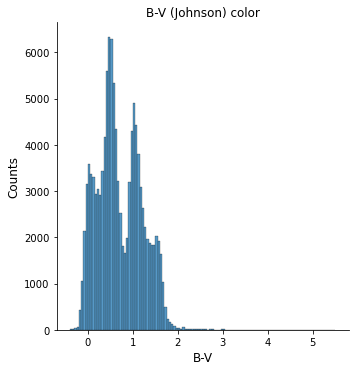

In [32]:
plt.figure(figsize=(12,6))
sns.displot(df["B-V"], binwidth=.05)
plt.title('B-V (Johnson) color')
plt.ylabel('Counts', fontsize=12)
plt.xlabel('B-V', fontsize=12)
plt.show()

In [33]:
df['VarFlag'].value_counts()

2.0    6351
1.0    4112
3.0    1099
Name: VarFlag, dtype: int64

In [37]:
df['HvarType'].value_counts()

C    46552
D    12361
U     7784
P     2708
R     1172
M     1045
Name: HvarType, dtype: int64

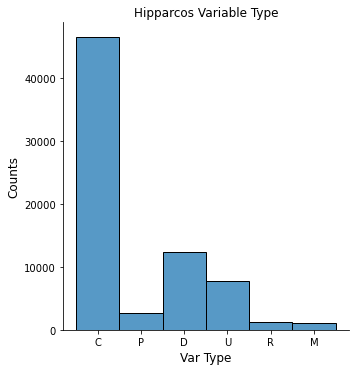

In [38]:
sns.displot(df["HvarType"])
plt.title('Hipparcos Variable Type')
plt.ylabel('Counts', fontsize=12)
plt.xlabel('Var Type', fontsize=12)
plt.show()

<AxesSubplot:xlabel='B-V', ylabel='Vmag'>

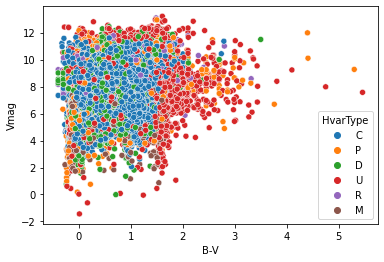

In [43]:
sns.scatterplot(x=df['B-V'], y=df['Vmag'], hue=df['HvarType'])

No strong correlation between the color, magnitude, and whether or not the star shows very much variability.

In [67]:
non_zero_periods = []
non_zero_period_v_mag = []

for index, row in df.iterrows():
    if row['Period'] > 0:
        non_zero_periods.append(row[51])
        non_zero_period_v_mag.append(row[5])


In [68]:
print(non_zero_periods[:5])

[327.5, 3.74, 0.17, 0.49, 2.09]


In [60]:
print(df.columns.get_loc("Period"))
print(df.columns.get_loc("Vmag"))

51
5


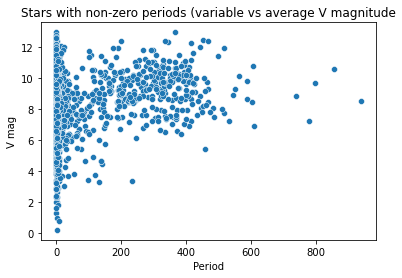

In [73]:
sns.scatterplot(x=non_zero_periods, y=non_zero_period_v_mag)
plt.title('Stars with non-zero periods (variable) vs average V magnitude')
plt.xlabel('Period')
plt.ylabel('V mag')
plt.show()

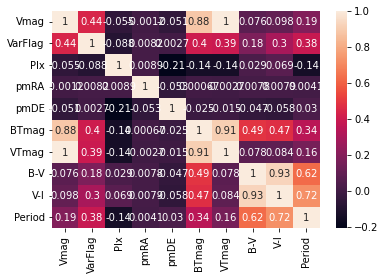

<Figure size 7200x7200 with 0 Axes>

In [77]:
interesting_fields = df[["Vmag", "RAhms", 'DEdms', 'VarFlag','Plx', 
                         'pmRA', 'pmDE', 'BTmag', 'VTmag', 'B-V', 
                         'V-I', 'Period', 'HvarType', 'SpType']]


corrMatrix = interesting_fields.corr()
sns.heatmap(corrMatrix, annot=True)
plt.figure(figsize=(100,100))
plt.show()





According to the correlation matrix, interesting 

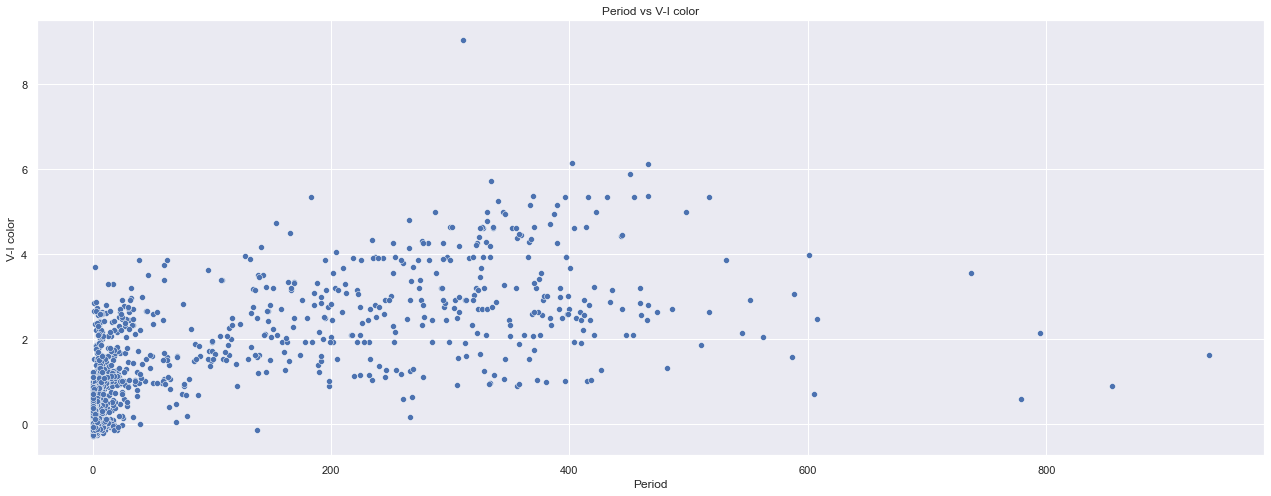

In [118]:
sns.scatterplot(x=interesting_fields['Period'], y=interesting_fields['V-I'])
sns.set(rc = {'figure.figsize':(22,8)})
plt.title('Period vs V-I color')
plt.xlabel('Period')
plt.ylabel('V-I color')
plt.show()

In [105]:
interesting_fields2 = interesting_fields.dropna(subset=['Period','V-I'])
v_i = interesting_fields2['V-I'].values.reshape(-1,1)
period = interesting_fields2['Period'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(v_i, period, test_size = 0.4, random_state = 7)


In [108]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

regressor.fit(X_train, y_train)


LinearRegression()

In [109]:
y_pred = regressor.predict(X_test)

In [113]:
df_preds = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred.squeeze()})
print(df_preds)

     Actual   Predicted
0      1.47   -5.649747
1    368.00  299.762454
2      4.21  137.692300
3    201.90  125.446999
4      2.58   27.484596
..      ...         ...
960  166.50  213.325038
961  414.00  319.931184
962    6.42   48.373638
963    2.69   -2.768500
964    2.40  -20.055983

[965 rows x 2 columns]


In [114]:
print(regressor.intercept_)

print(regressor.coef_)


[-13.57317667]
[[72.03117935]]


In [111]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [112]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)


print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')


Mean absolute error: 46.59
Mean squared error: 7448.67
Root mean squared error: 86.31


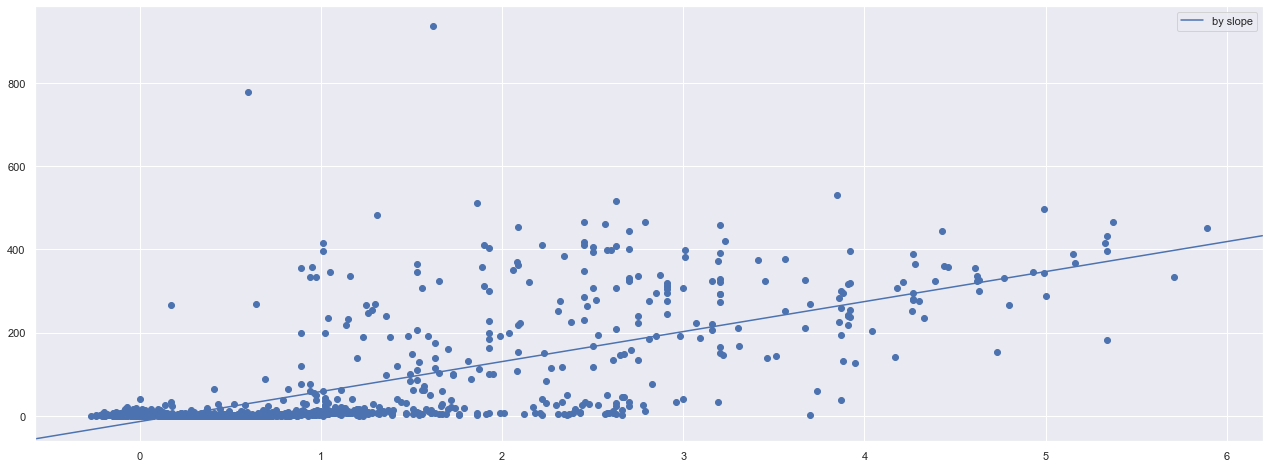

In [129]:


fig, ax = plt.subplots()
plt.scatter(X_train, y_train)
ax.axline((0, -13.57317667), slope=72.03117935, color='C0', label='by slope')

ax.legend()

In [ ]:
#need to calculate bias/variance, check higher order polynomial